In [ ]:
# import statements for data analysis

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for plotting
from scipy.stats import mannwhitneyu, rankdata
import squarify # for treemaps

# machine learning imports
from sklearn.preprocessing import MinMaxScaler # for scaling data
from sklearn.preprocessing import RobustScaler # for scaling data

#cleaning imports from custom module
import cleaning as clean

#magic word for producing visualizations in notebook
%matplotlib inline

#ignore warnings

import warnings
warnings.filterwarnings('ignore')

# remove pandas truncation
pd.set_option('display.max_columns', None)

In [ ]:
# this cell preprocesses the raw data for easier analysis
# some preprocesssing is done during file creation but these are the final steps
# and are season specific.

df = pd.read_csv('match_data_40/match_data_40.csv')
clean.clean_date(df)
clean.clean_medals(df)
clean.clean_teams(df)
#clean.clean_duration(df)
df.head()


,match_id,date,account_id,personaname,teamID,rank_tier,kills,assists,deaths,kills_per_min,kda,denies,gold,gold_per_min,gold_spent,hero_damage,damage_taken,hero_healing,hero_id,item_0,item_1,item_2,item_3,item_4,item_5,item_neutral,last_hits,level,net_worth,tower_damage,xp_per_min,radiant_win,duration,patch,isRadiant,win,lose,total_gold,total_xp,obs_placed,sen_placed,rune_pickups,camps_stacked,stuns,creeps_stacked,firstblood_claimed,pings,teamfight_participation,roshans_killed,medal
0,7196449176,2023-06-11,179771107,Cranberry,fock carmers,21,12,20,3,0.360180,8,3,342,568,19480,19477,0,0,Sand King,210,90,1,242,0,180,289,171,19,18142,1757,607,True,1999,52,True,1,0,18923,20223,0,0,0,0,0.0,0,0,0.0,0.0,0,L1
1,7196449176,2023-06-11,105289584,Otto.vB,fock carmers,29,13,21,0,0.390195,34,10,1578,580,19110,21486,0,0,Riki,174,123,63,75,160,53,381,162,22,18783,5649,816,True,1999,52,True,1,0,19323,27186,0,0,0,0,0.0,0,0,0.0,0.0,0,N4
2,7196449176,2023-06-11,167964359,iCoffeeCat,fock carmers,14,8,7,2,0.240120,5,15,4338,647,18320,12813,0,0,Bloodseeker,0,154,50,139,166,168,378,258,21,21213,14072,710,True,1999,52,True,1,0,21555,23654,0,0,0,0,0.0,0,0,0.0,0.0,0,C4
3,7196449176,2023-06-11,107499107,Holladay1999,fock carmers,29,6,19,3,0.180090,6,5,927,338,11005,13106,0,1217,Nyx Assassin,36,180,0,188,40,202,331,15,18,11757,2815,573,True,1999,52,True,1,0,11261,19090,0,0,0,0,0.0,0,0,0.0,0.0,0,N4
4,7196449176,2023-06-11,137104580,SPAZ is a SPAZ,fock carmers,17,1,21,5,0.030015,3,2,1447,318,9535,10365,0,0,Crystal Maiden,254,102,36,0,214,185,990,47,15,10322,1114,390,True,1999,52,True,1,0,10594,12993,0,0,0,0,0.0,0,0,0.0,0.0,0,A2


### Player Distribution

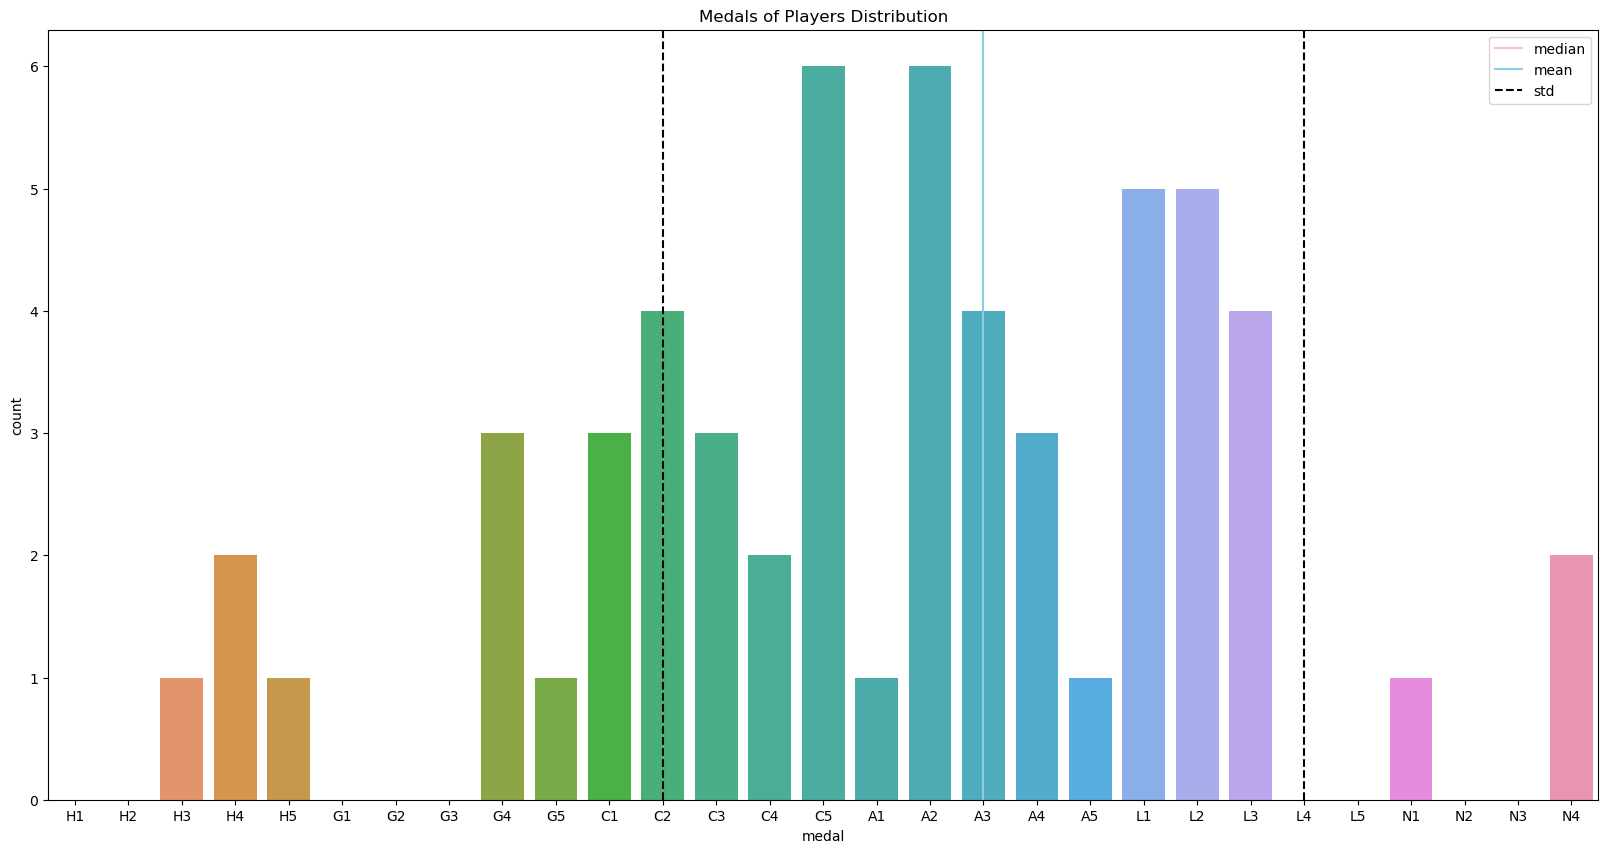

In [ ]:
clean.ranks(df)

This season saw an overall shift to higher MMR with the STDDEV and Average moving up 1 medal and the median rising 2 medals. This is to be expected given glicko recalibrations scuffs.

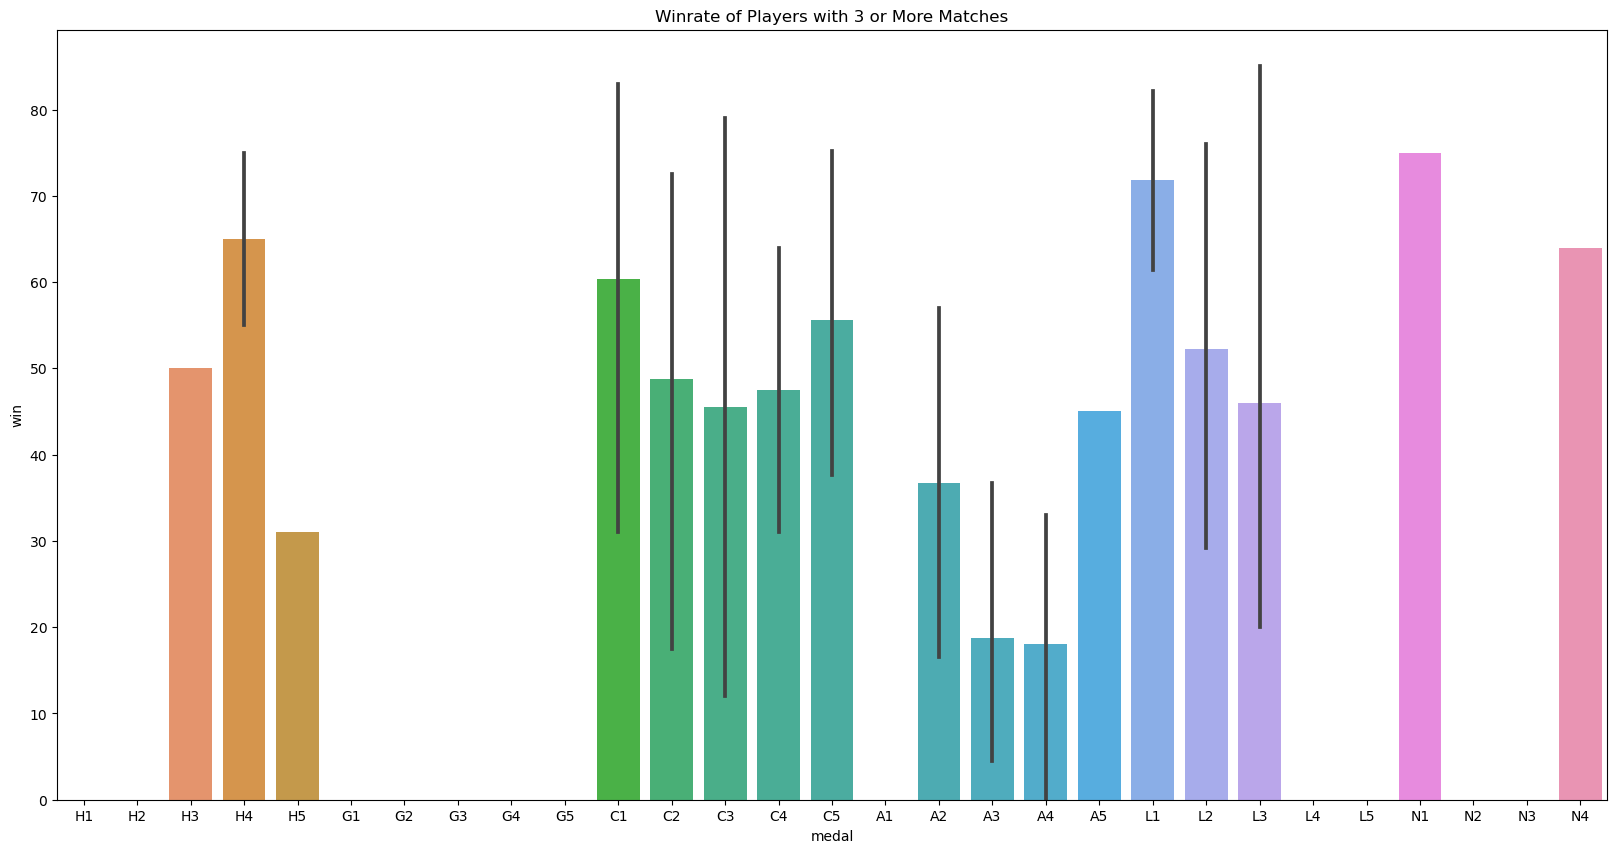

In [ ]:
clean.three_plus(df)

Winrates are not as even with lowest rank suffering the most this season. I wonder if more players playedd "offroles" this season and that is why the winrates are so skewed. Overall, each medal bracket saw a drop in winrate with a major increase in the standard deviation. 

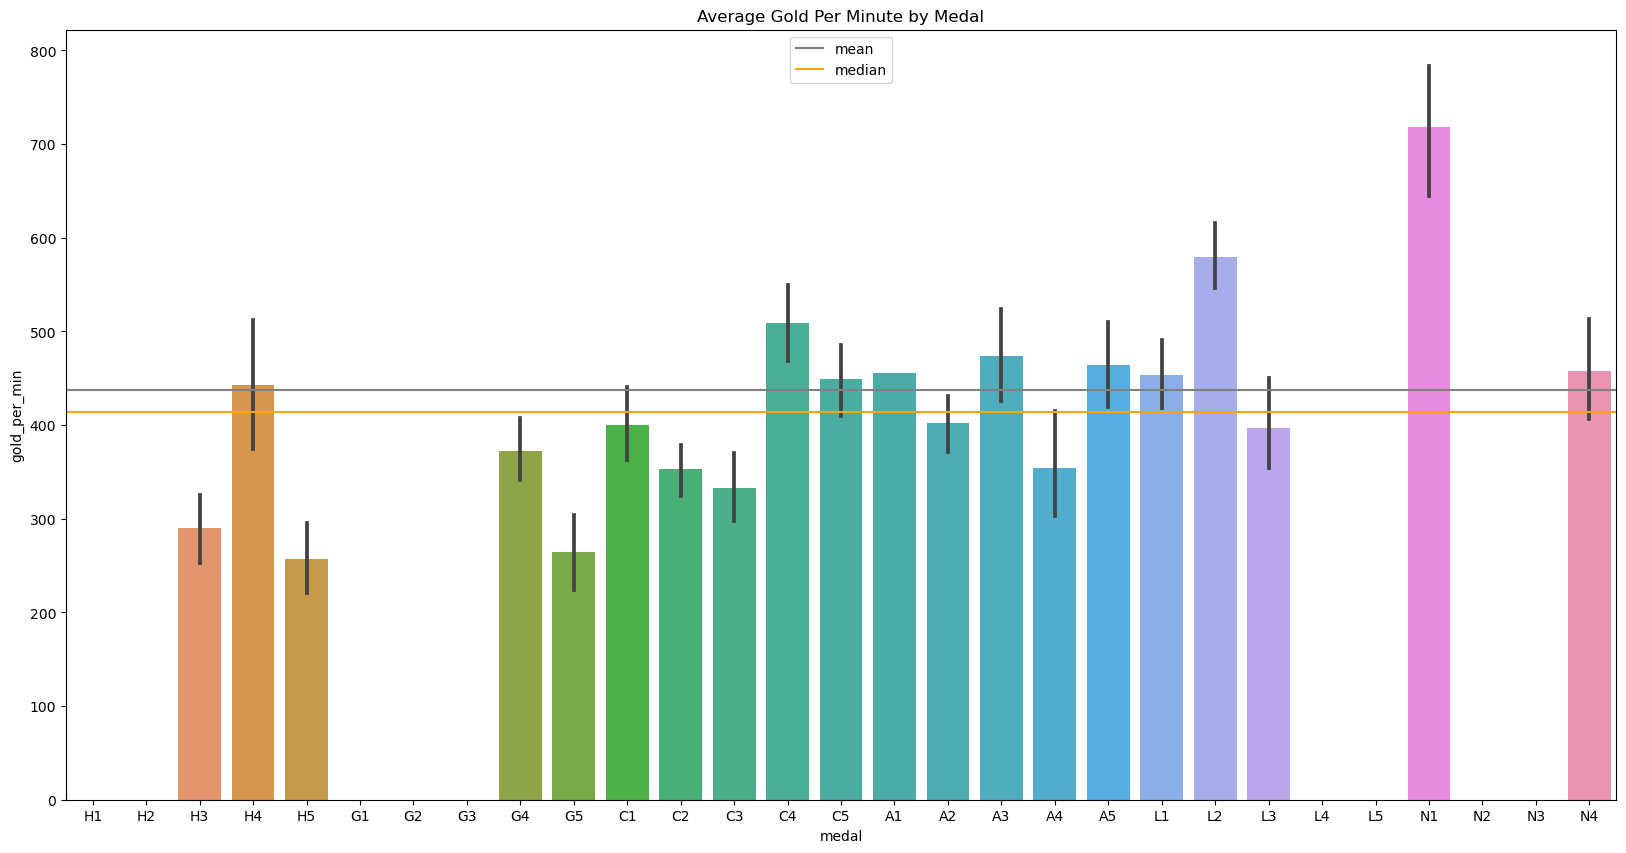

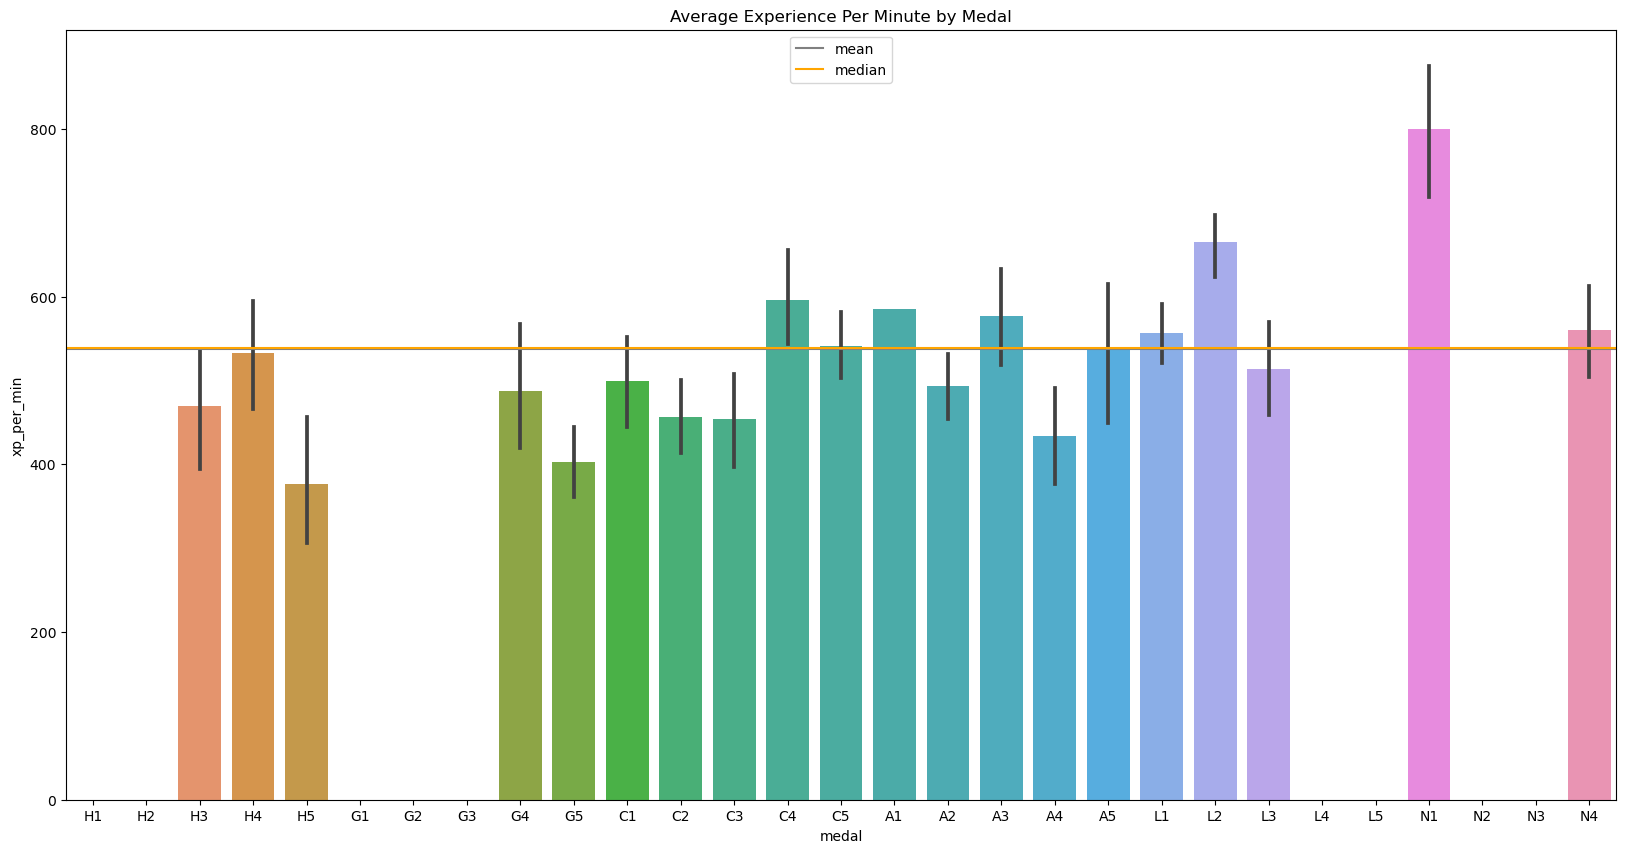

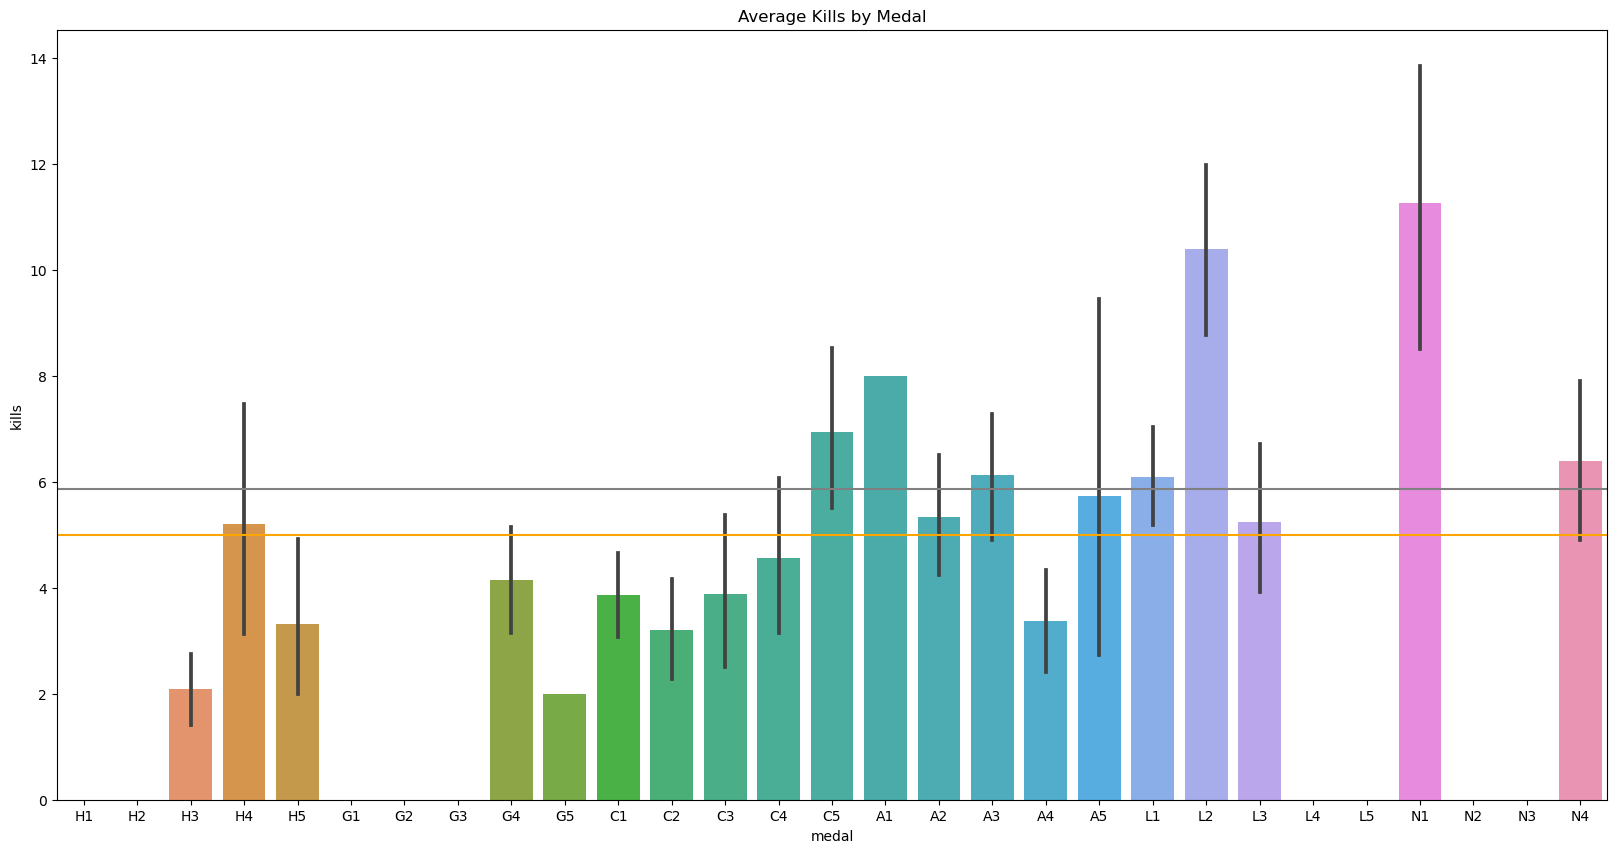

In [ ]:
clean.xpmgpmkda(df)

Our few higher than legend players have absoultey destroyed the season in metrics. Something I find interesting about this chart compared to last season is a near identical average kills and GPM but XPM is substantially lower, especially for lower ranked individuals. #BRING BACK TOME

In [ ]:
clean.medals_winrate(df)

Low Rank Winrate:  42.2  +/-  25.33
Middle Rank Winrate:  46.8  +/-  27.63
High Rank Winrate:  52.75  +/-  26.22


# Toxicity

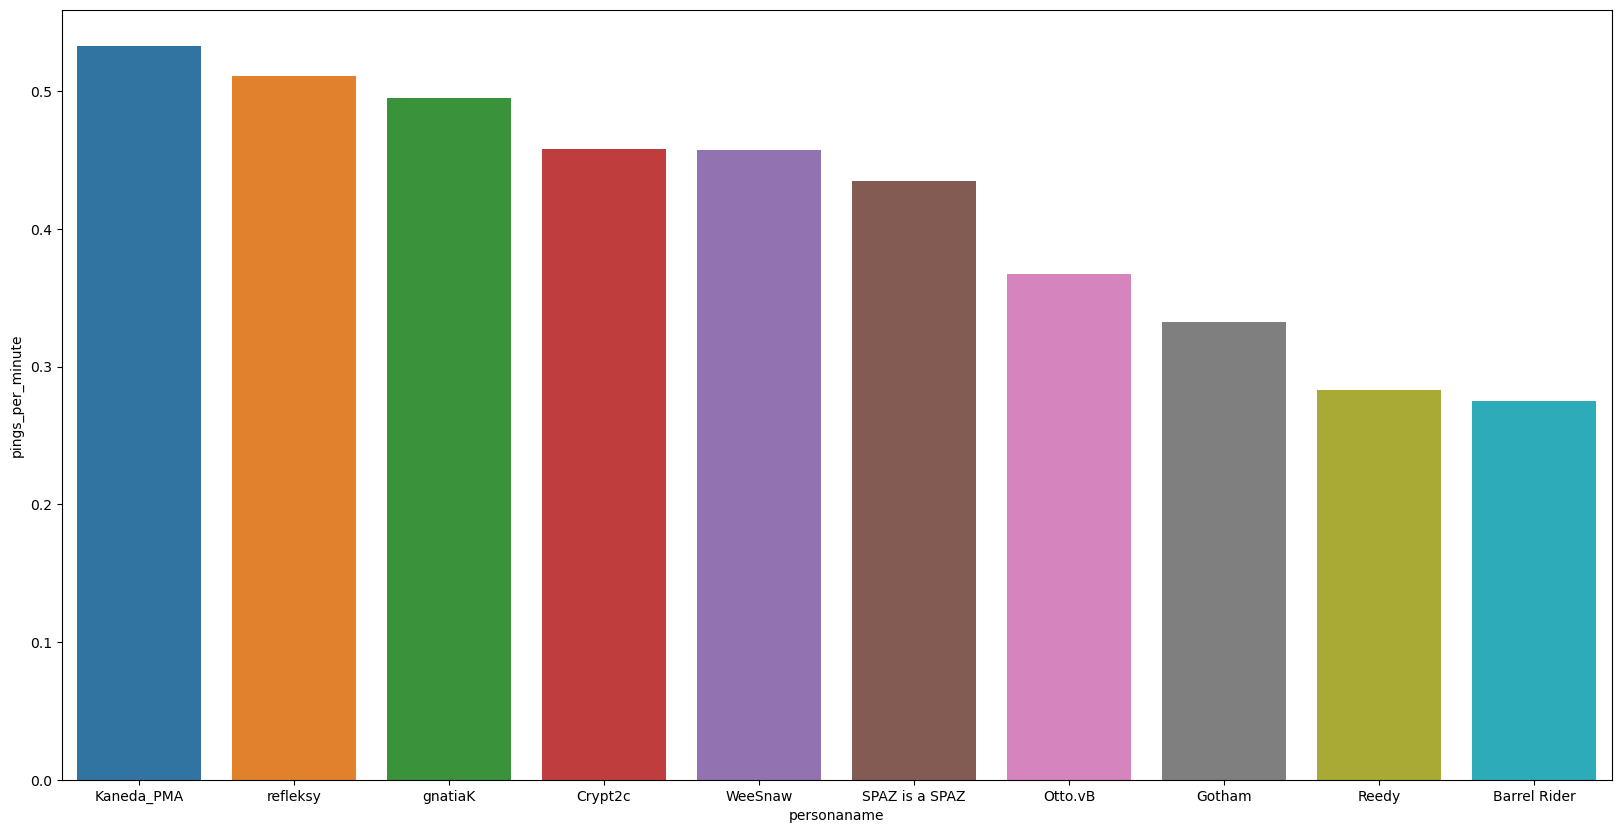

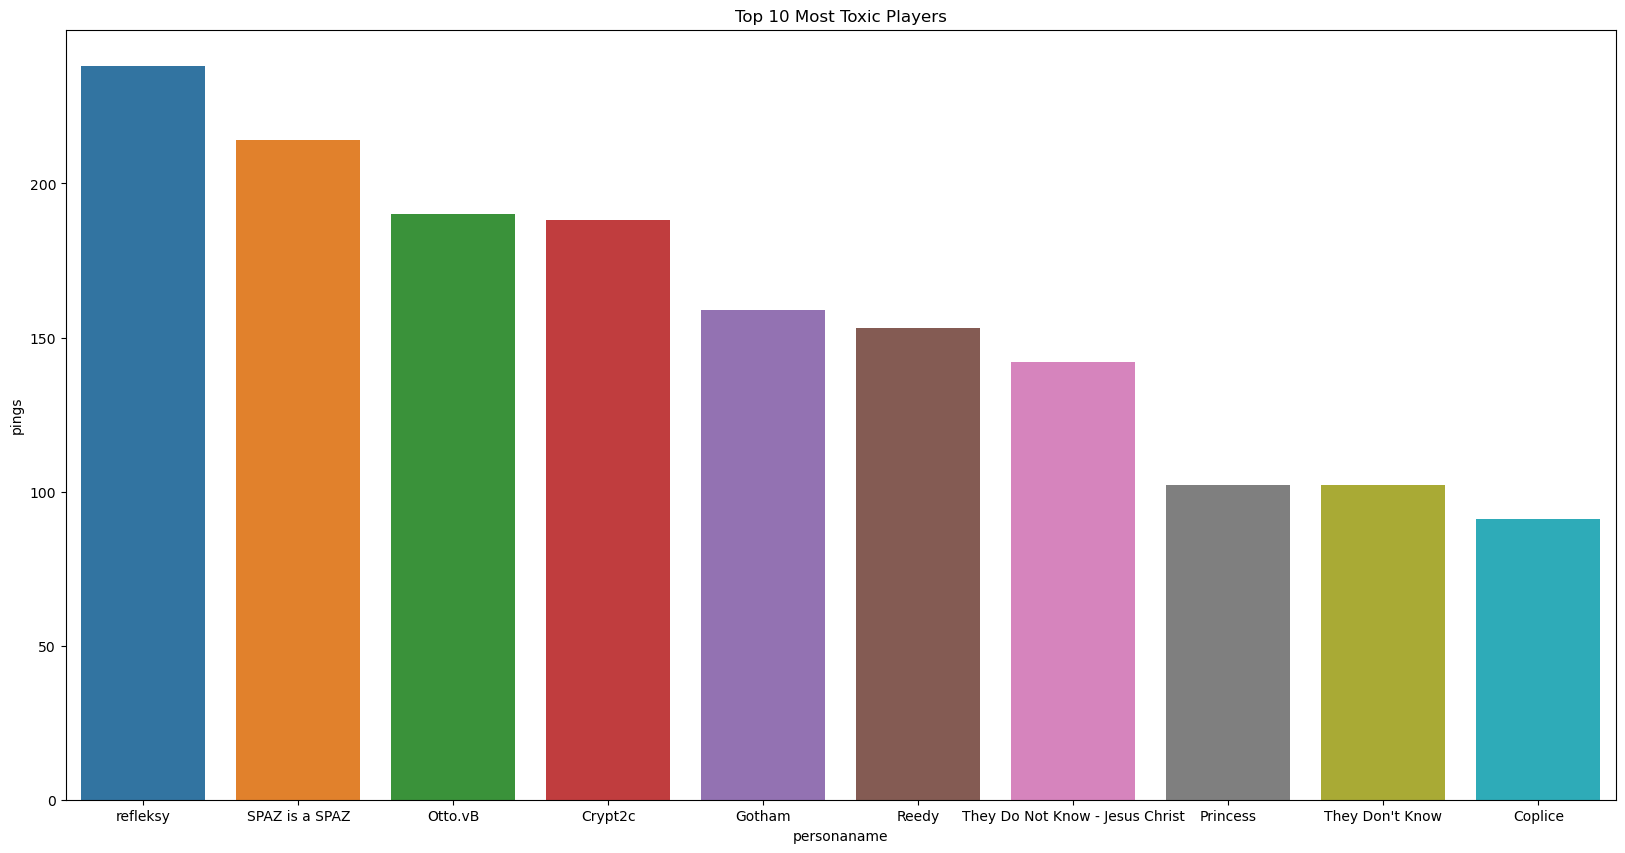

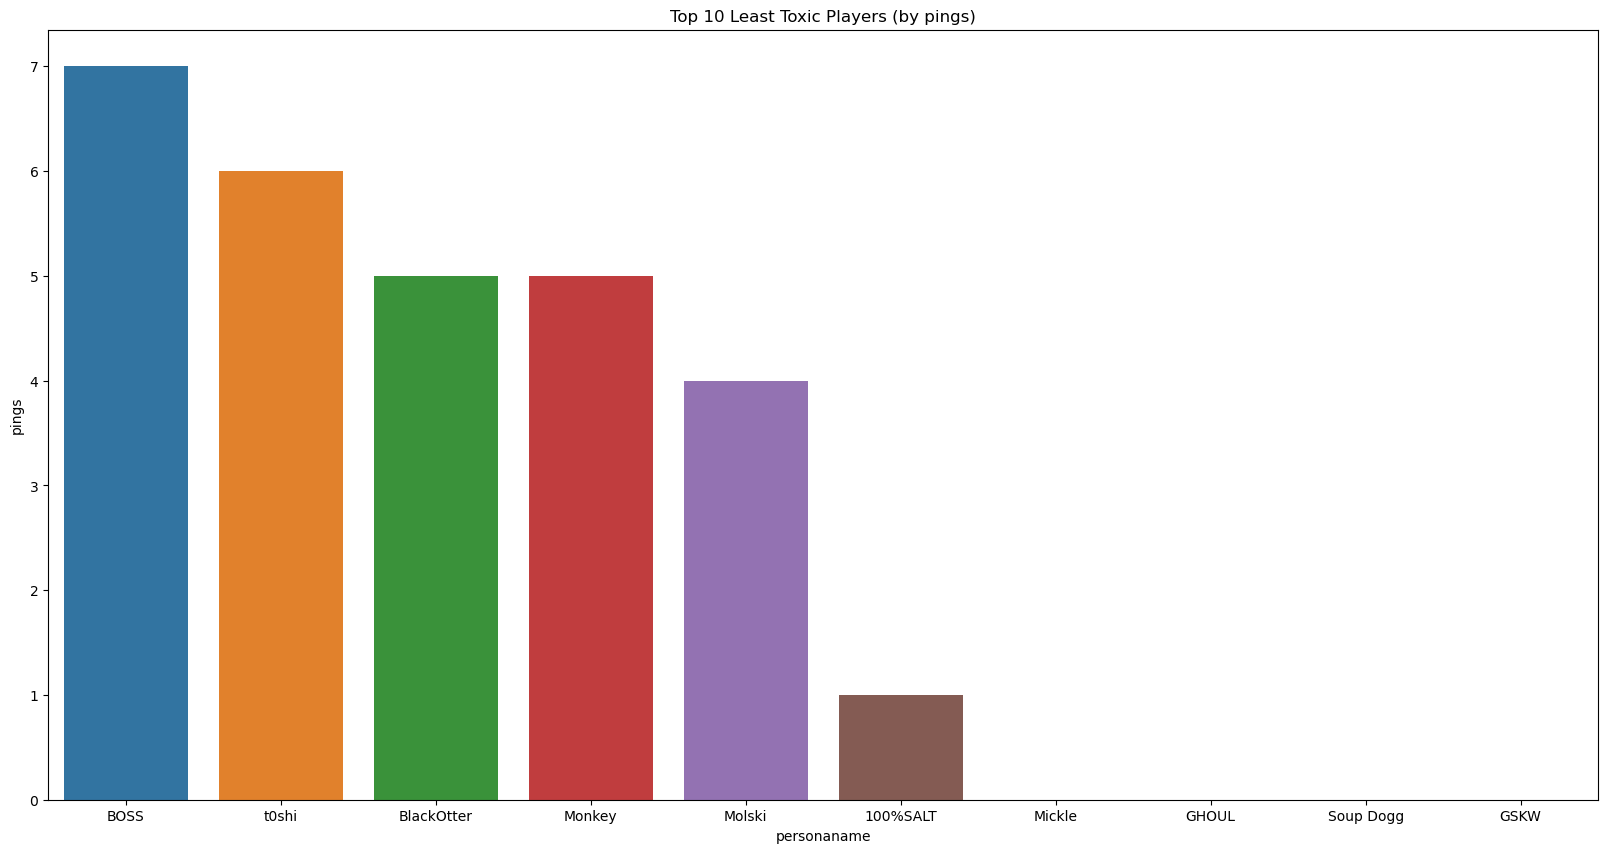

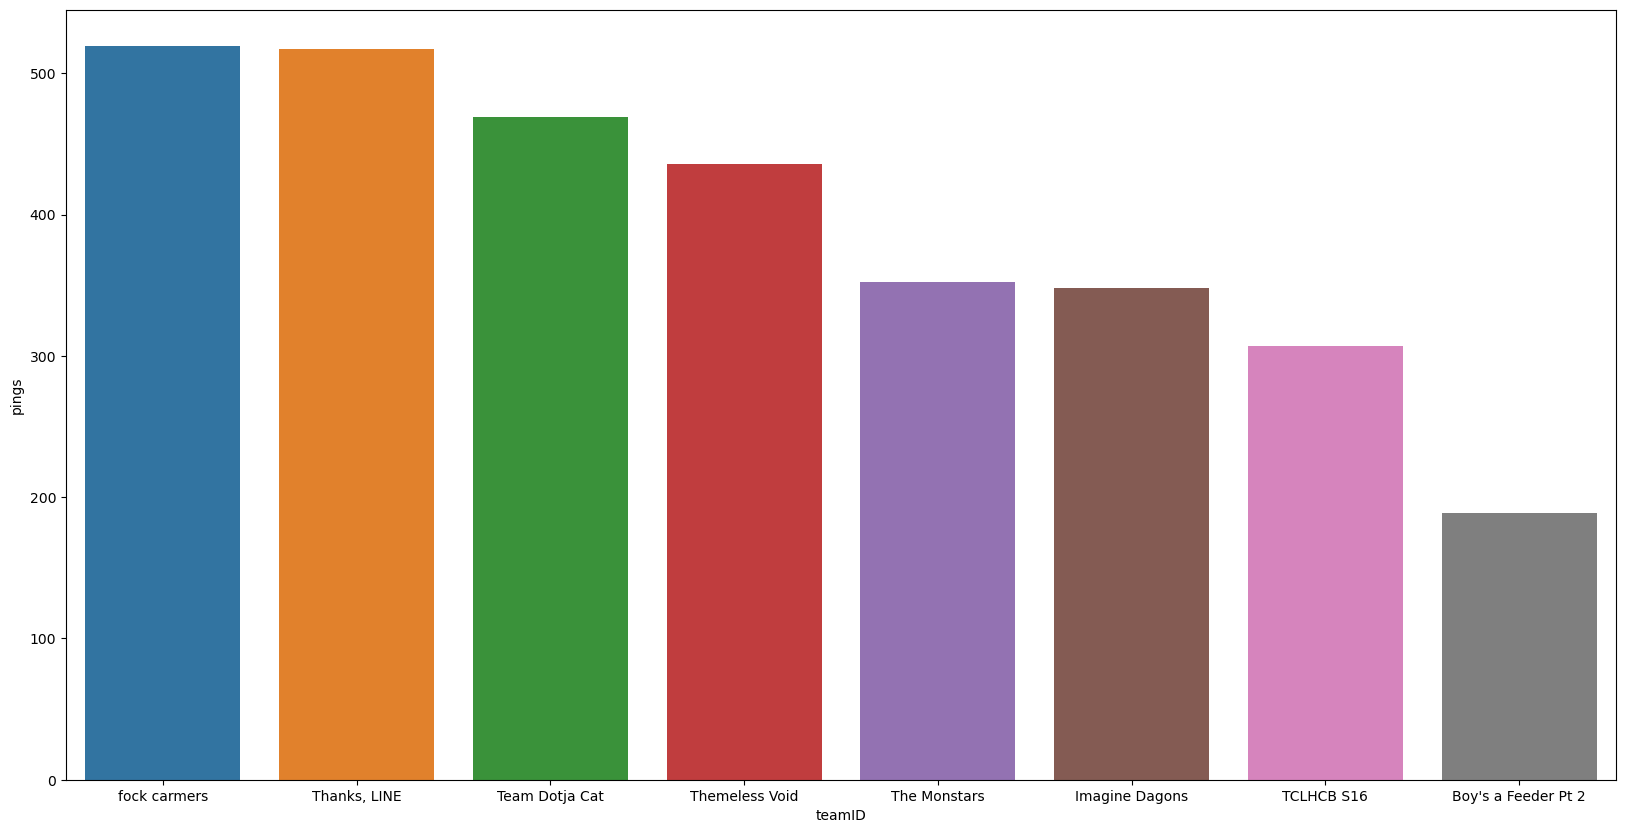

In [ ]:
clean.die_pingers(df)

Molski in the least toxic players category 2 seasons in a row. Reflexy though is pinging once every other minute. Either this man is checking runes lotus and watcher for the whole team or is big mad.

### Learn 2 Dota 2 learn to Play League?

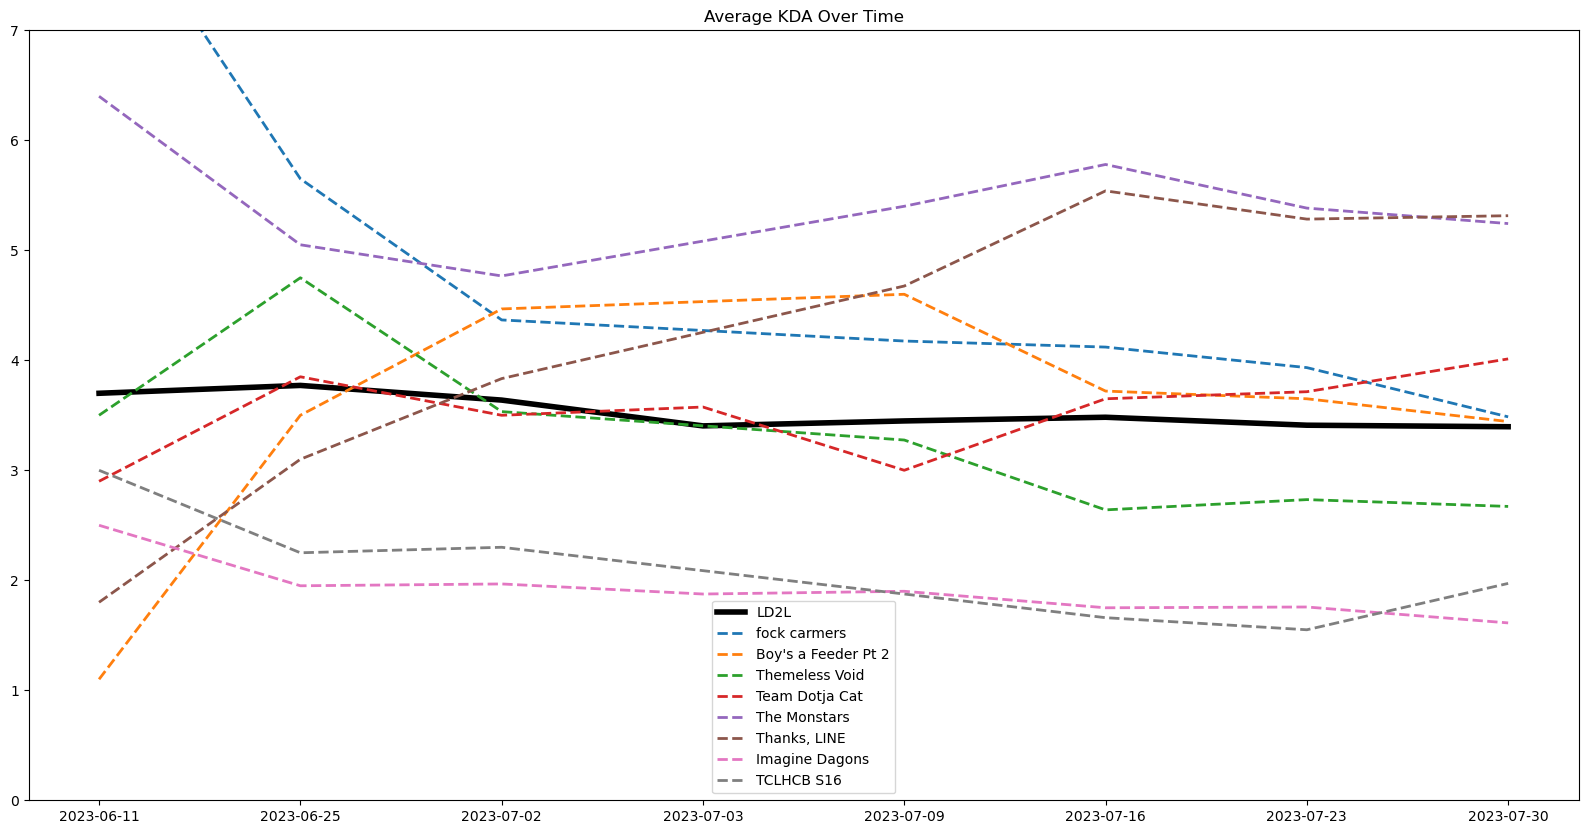

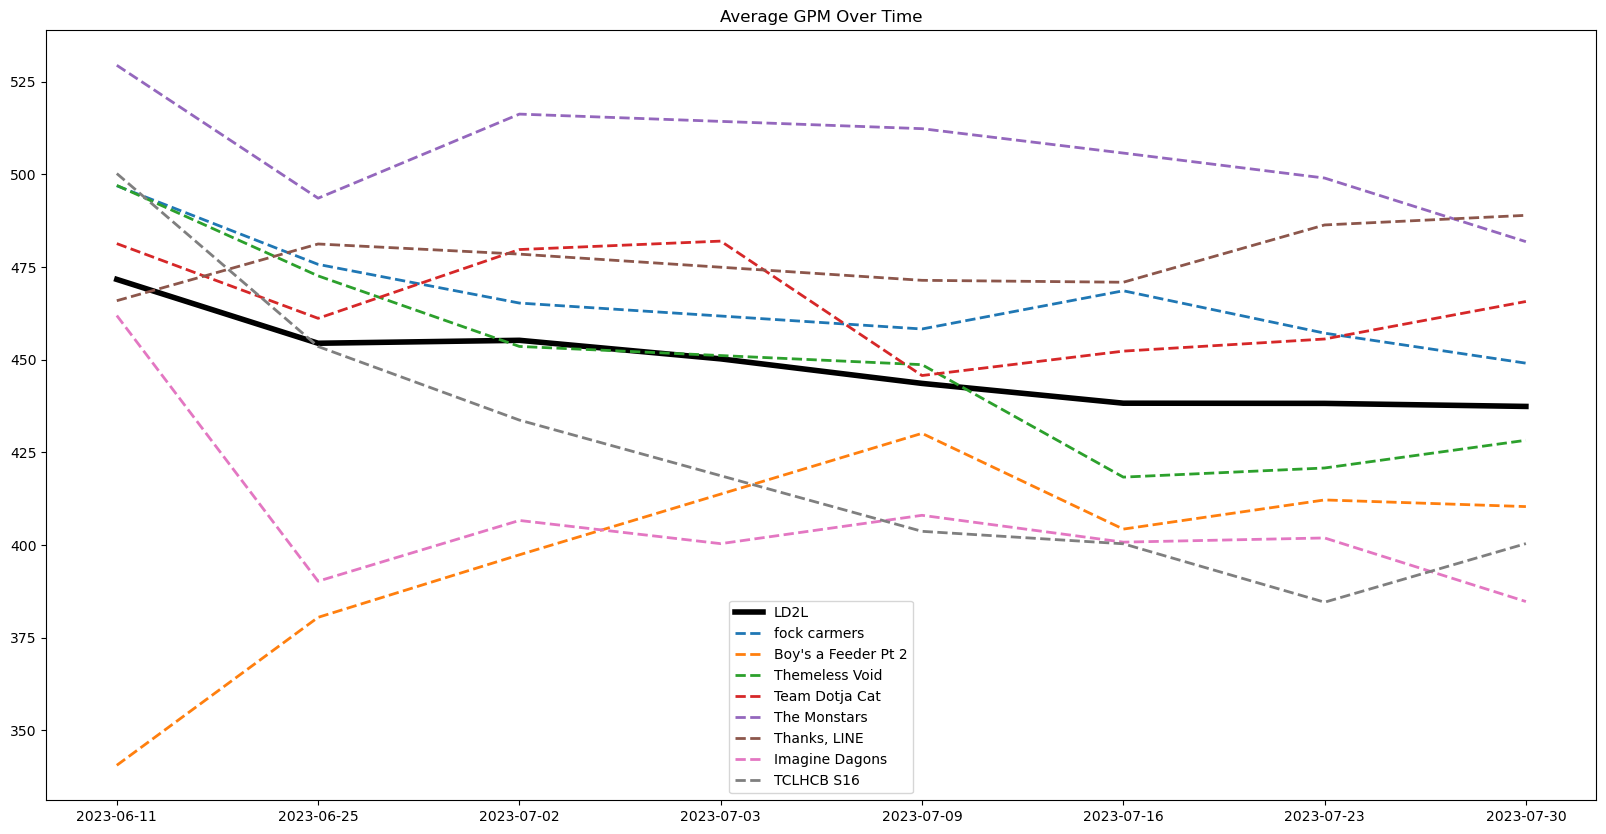

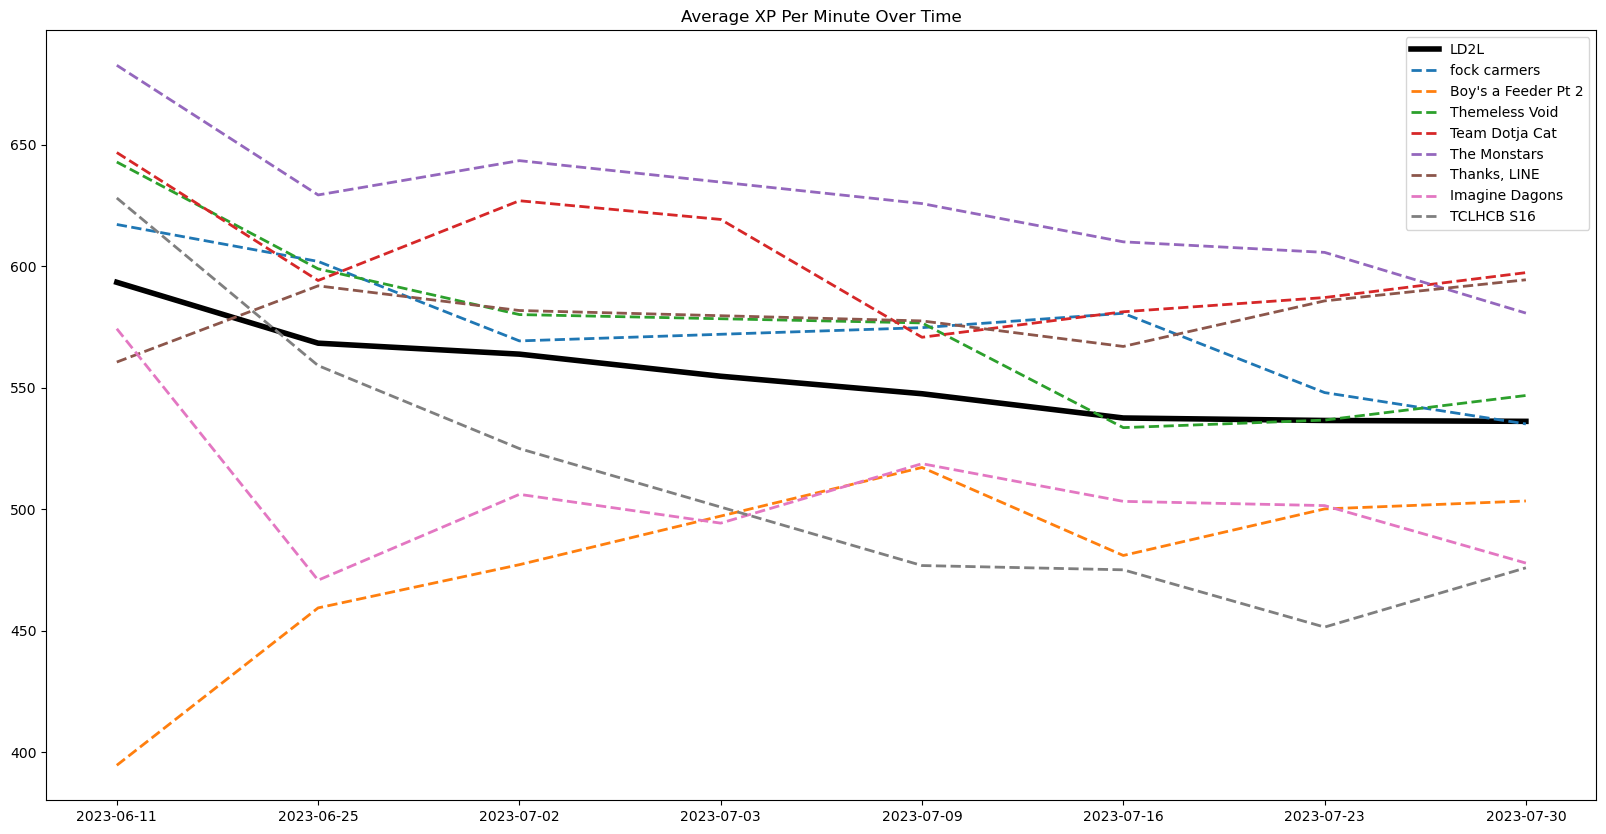

In [ ]:
clean.time_series_plotting(df)

I find these graphs particularly interesting due to the fact that there is a negative trending throuhought the season that had very little meta changes. Absolutely no team finished with a cumaltive higher average that is meaningfully higher in any category except for Hollywood and PVC. I think this is a testament to the fact that the meta is not as important as the team you have. 

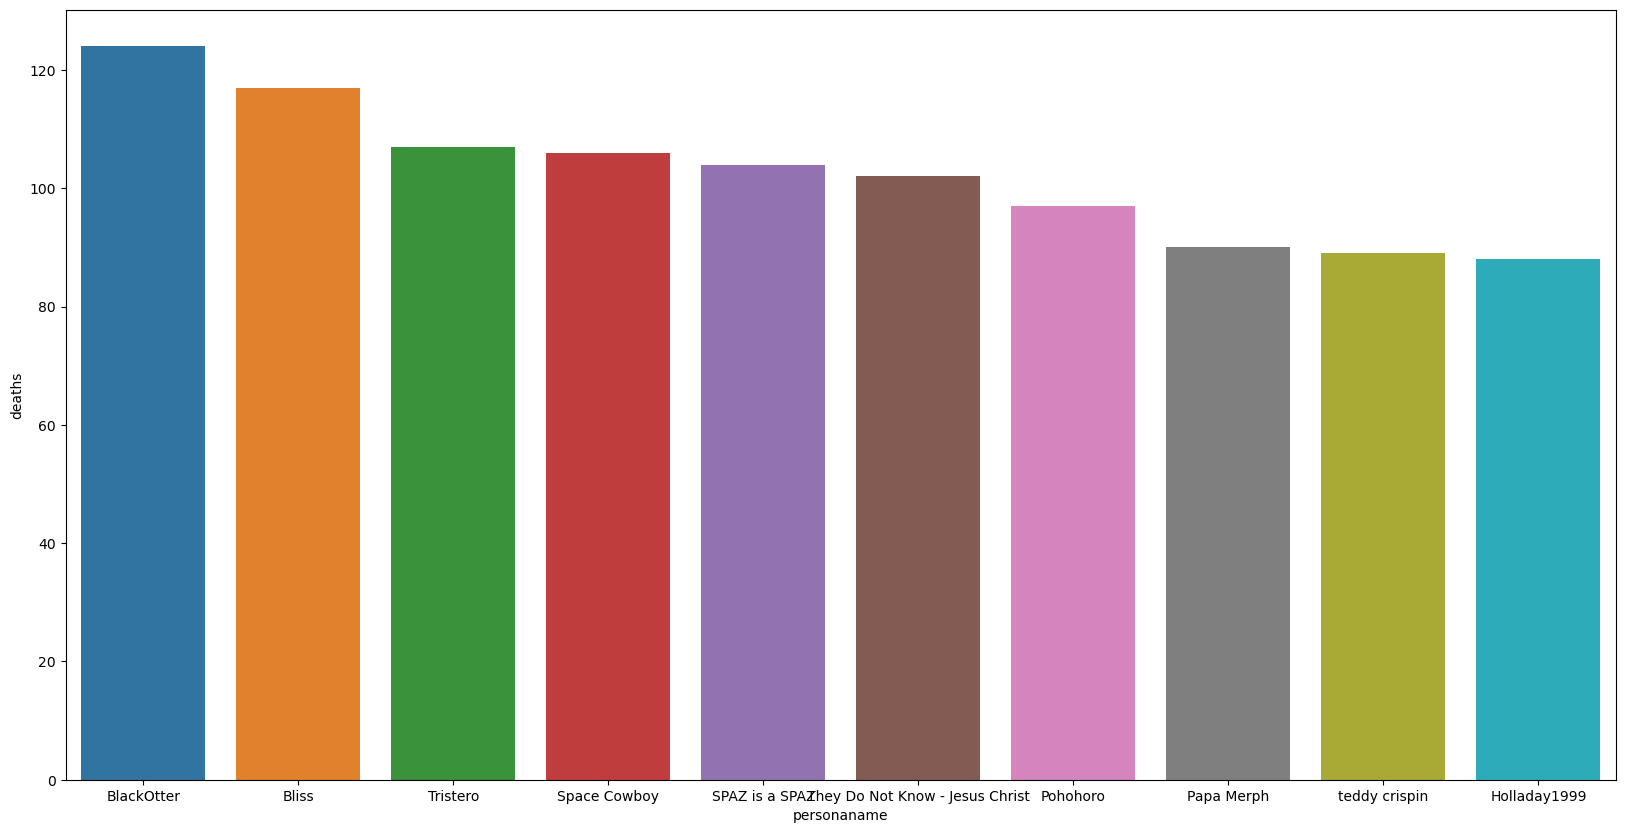

In [ ]:
df_deaths = df[df['account_id'].isin(df['account_id'].value_counts()[df['account_id'].value_counts() >= 3].index)]

df_deaths = df_deaths.groupby('personaname')[['deaths']].sum().reset_index()

plt.figure(figsize=(20,10))
sns.barplot(x='personaname', y='deaths', data=df_deaths.sort_values('deaths', ascending=False).head(10))
plt.show()

Blackotter more like other team fodder.

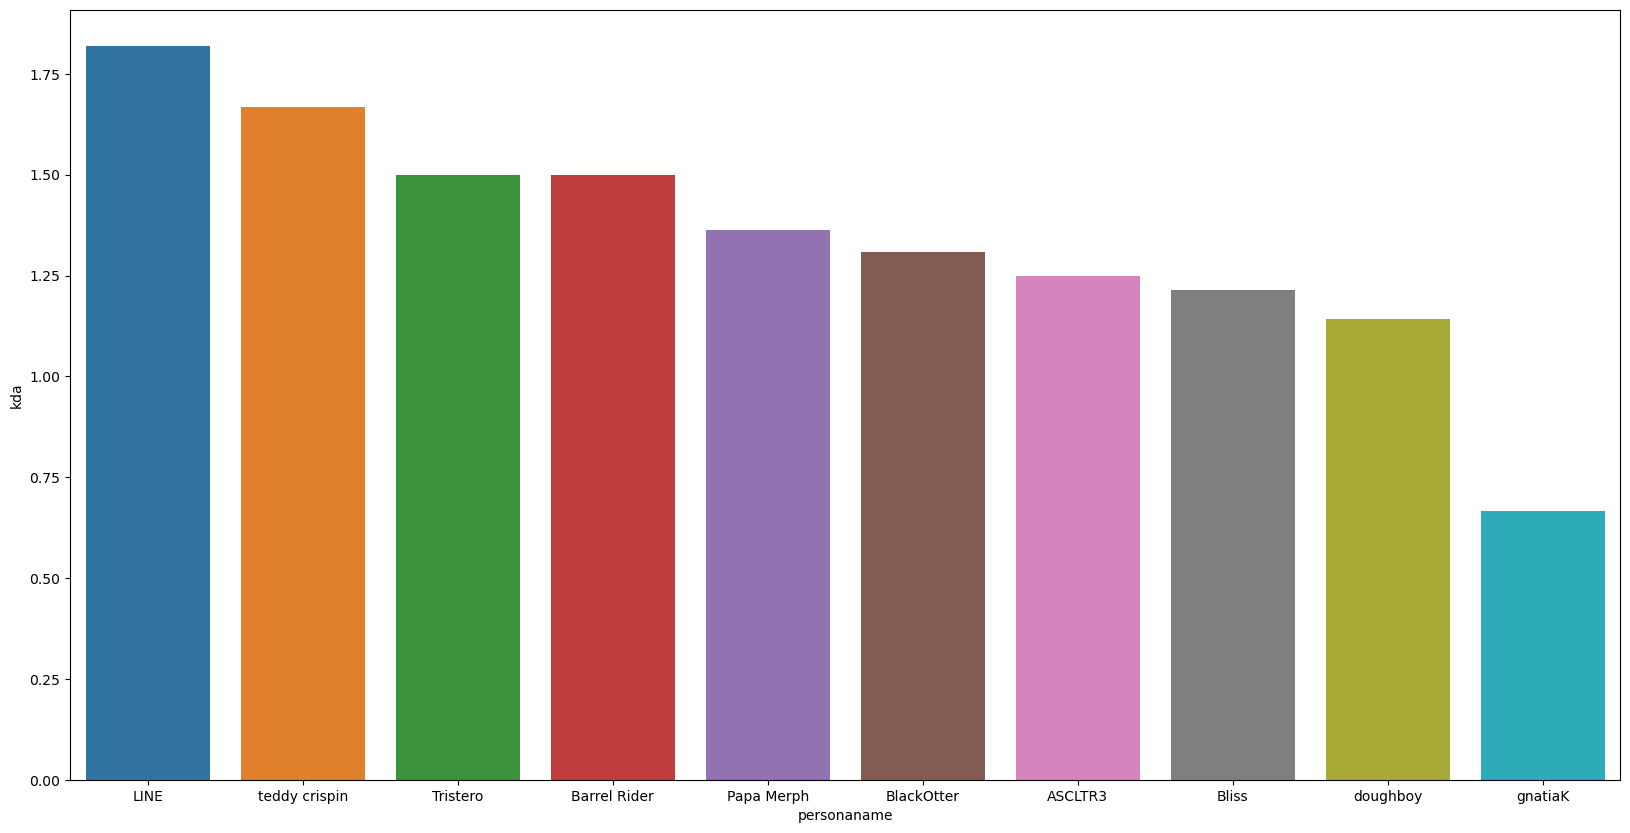

In [ ]:
df_kda = df[df['account_id'].isin(df['account_id'].value_counts()[df['account_id'].value_counts() >= 3].index)]


df_kda = df_kda.groupby('personaname')['kda'].mean().reset_index()
# remove mattyboy
df_kda = df_kda[df_kda['personaname'] != 'Matty Boy']
# remove 0 kda
df_kda = df_kda[df_kda['kda'] != 0]
#remove rada
df_kda = df_kda[df_kda['personaname'] != 'Rada']

plt.figure(figsize=(20,10))
sns.barplot(x='personaname', y='kda', data=df_kda.sort_values('kda', ascending=False).tail(10))
plt.show()

While blackotter is certified feeder, his KDA is still above 1, meaning he participated in more kills than deaths. This is a testament to the fact that he is a team player and is willing to sacrifice himself for the greater good. 

Dusty is the only core player in the top deaths list.

Unlike last season, there isn't a clear correlation between deaths and losses, also only Bliss and blackotter on both lists. Both of those players however had higher than 1 KDA meaning they were still contributing to the team.

Mattyboy and rada were removed from consideration due to not playing enough games but had the lowest KDA contribution for the whole league.

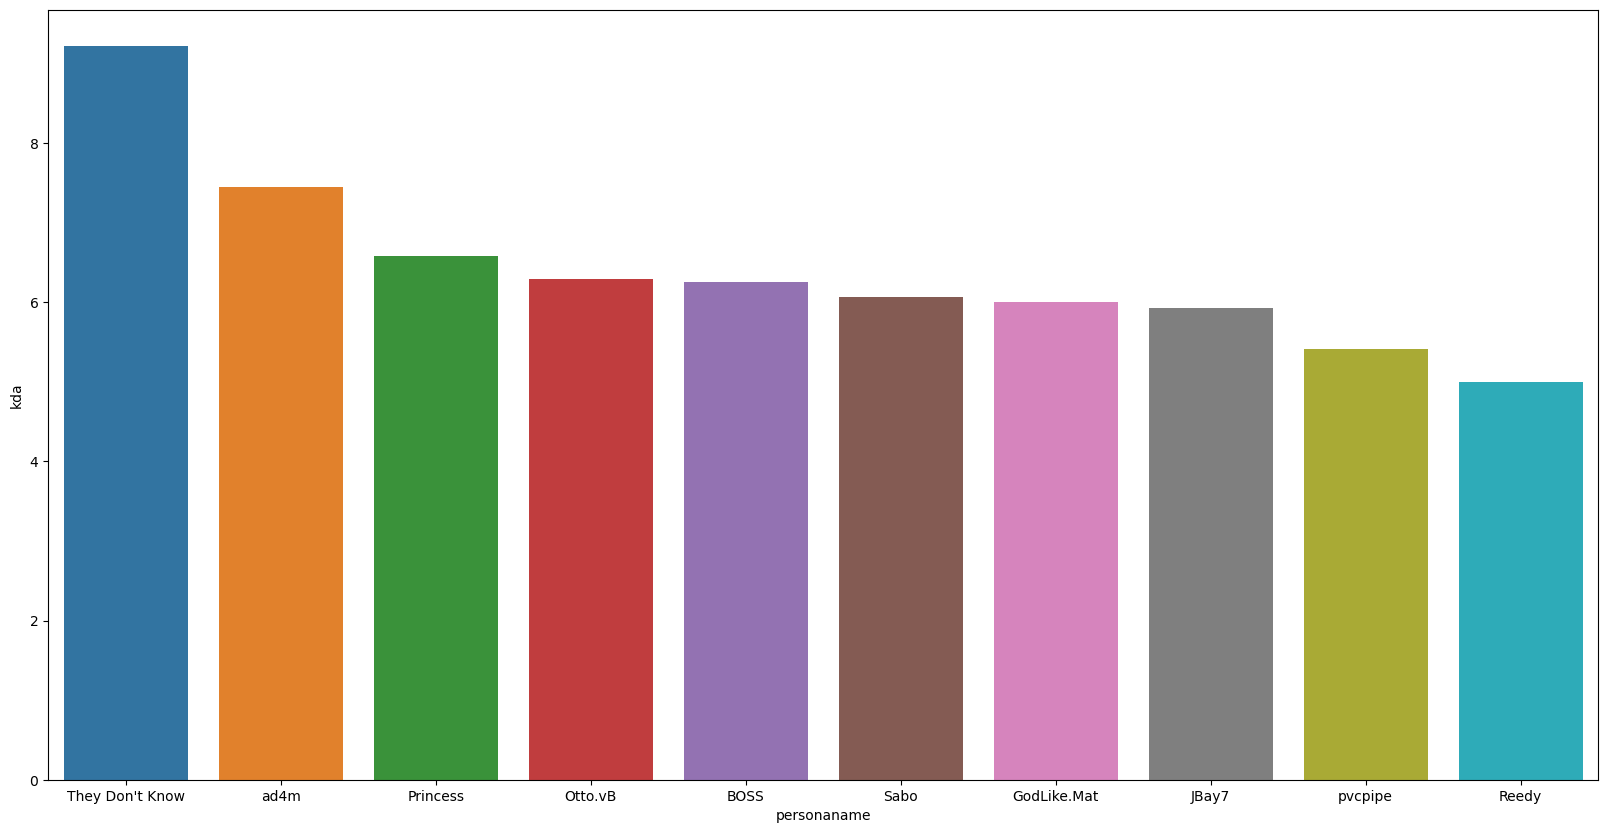

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='personaname', y='kda', data=df_kda.sort_values('kda', ascending=False).head(10))
plt.show()

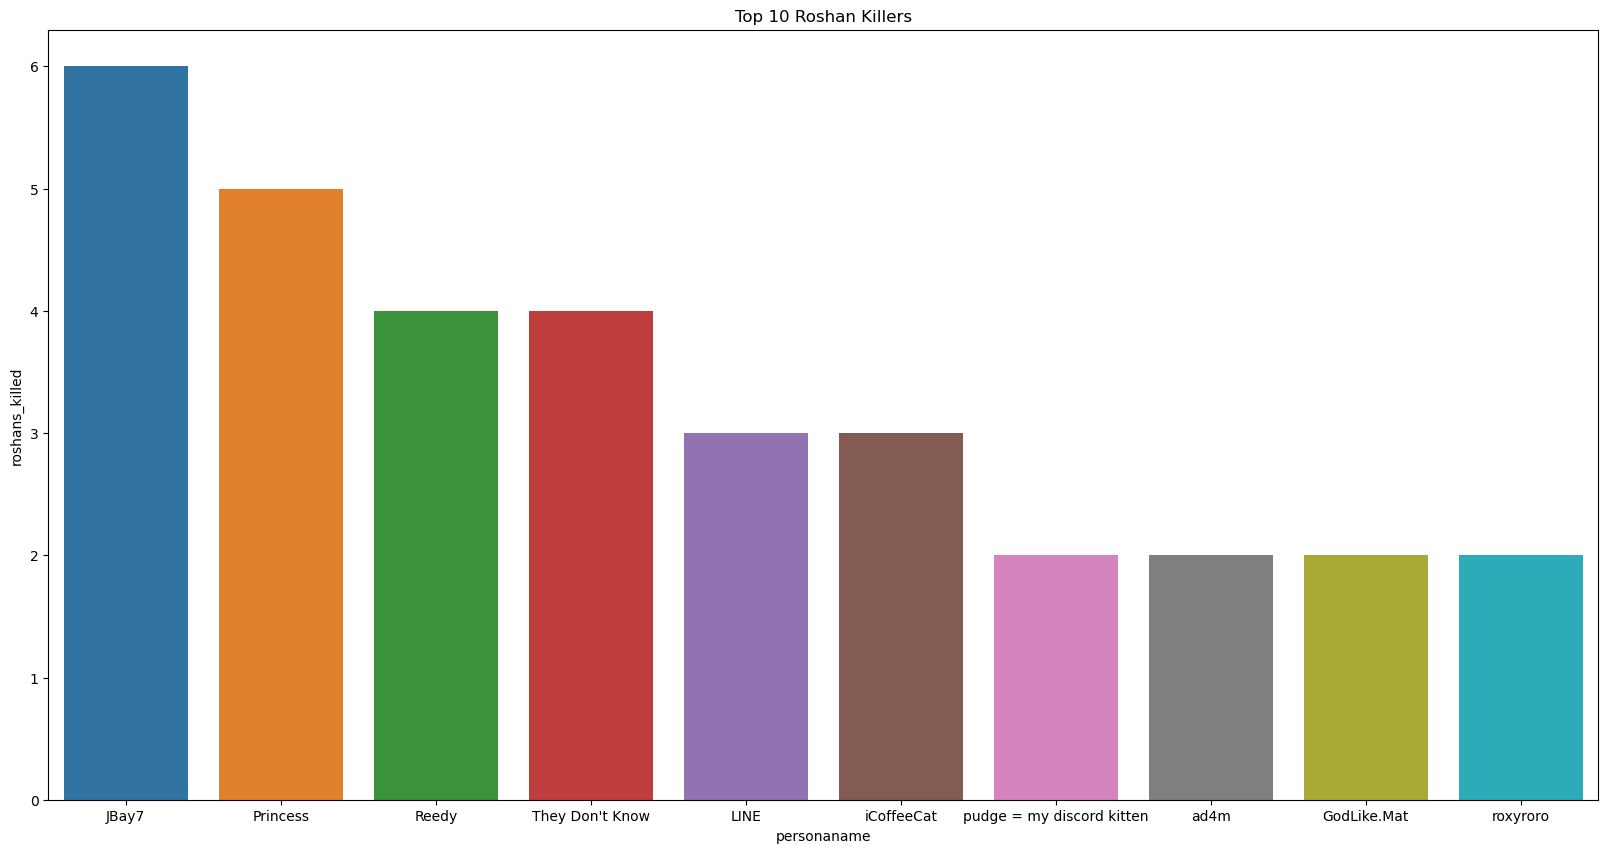

In [ ]:
clean.roshan_haters(df)

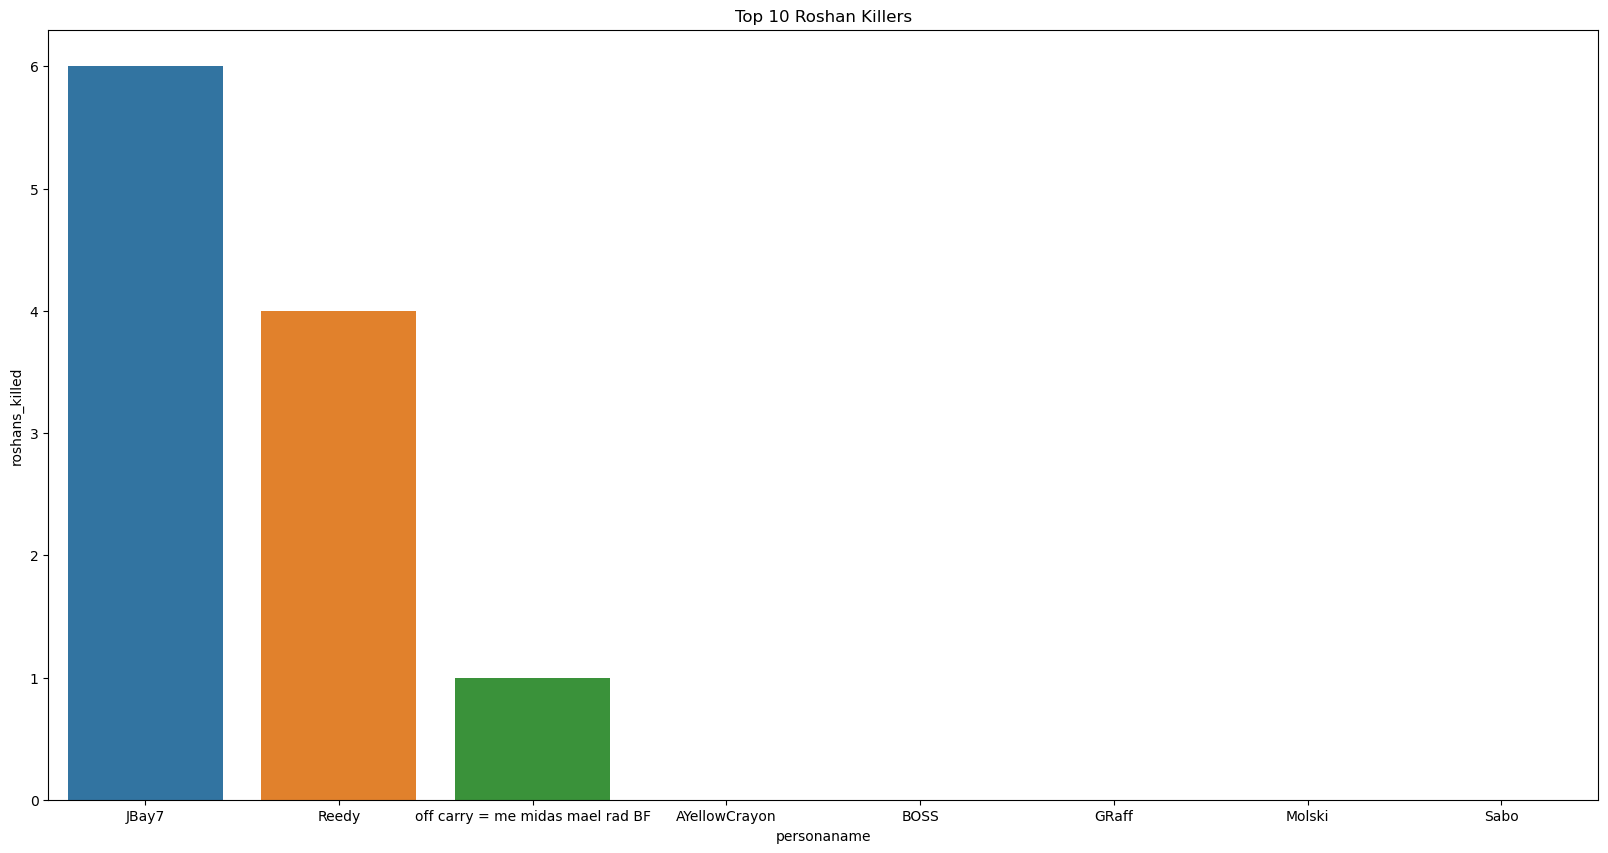

In [ ]:
clean.roshan_haters(df[df.teamID == 'The Monstars'])

Jbay got the most kills on rosh and his team killed rosh the most. Reedy team really be into killing innocent little dragons in their cave. Get out of there you monsters.

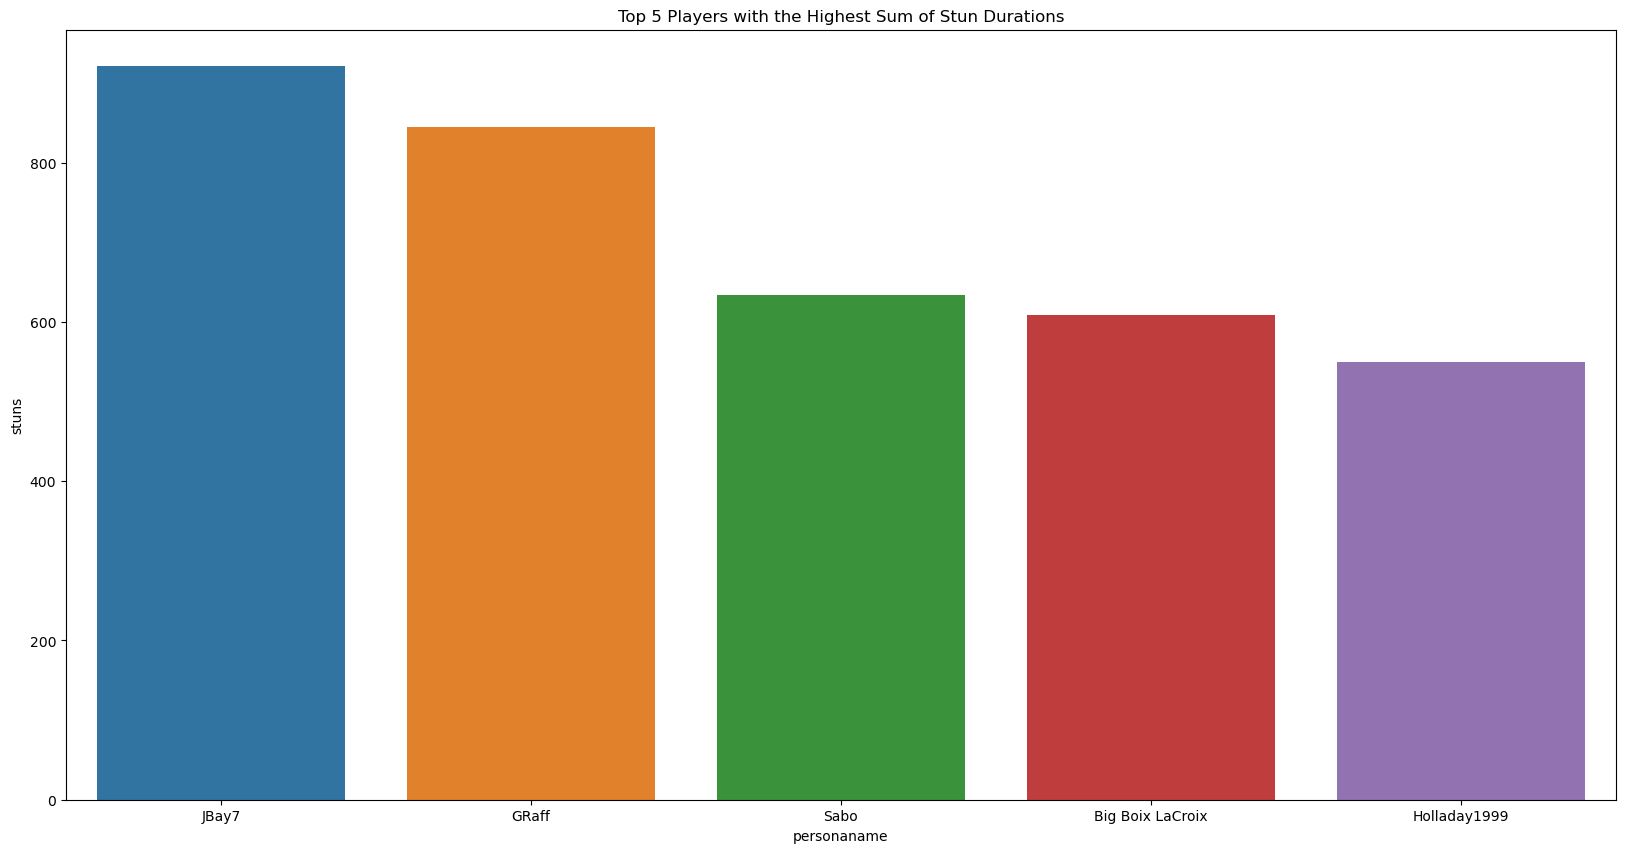

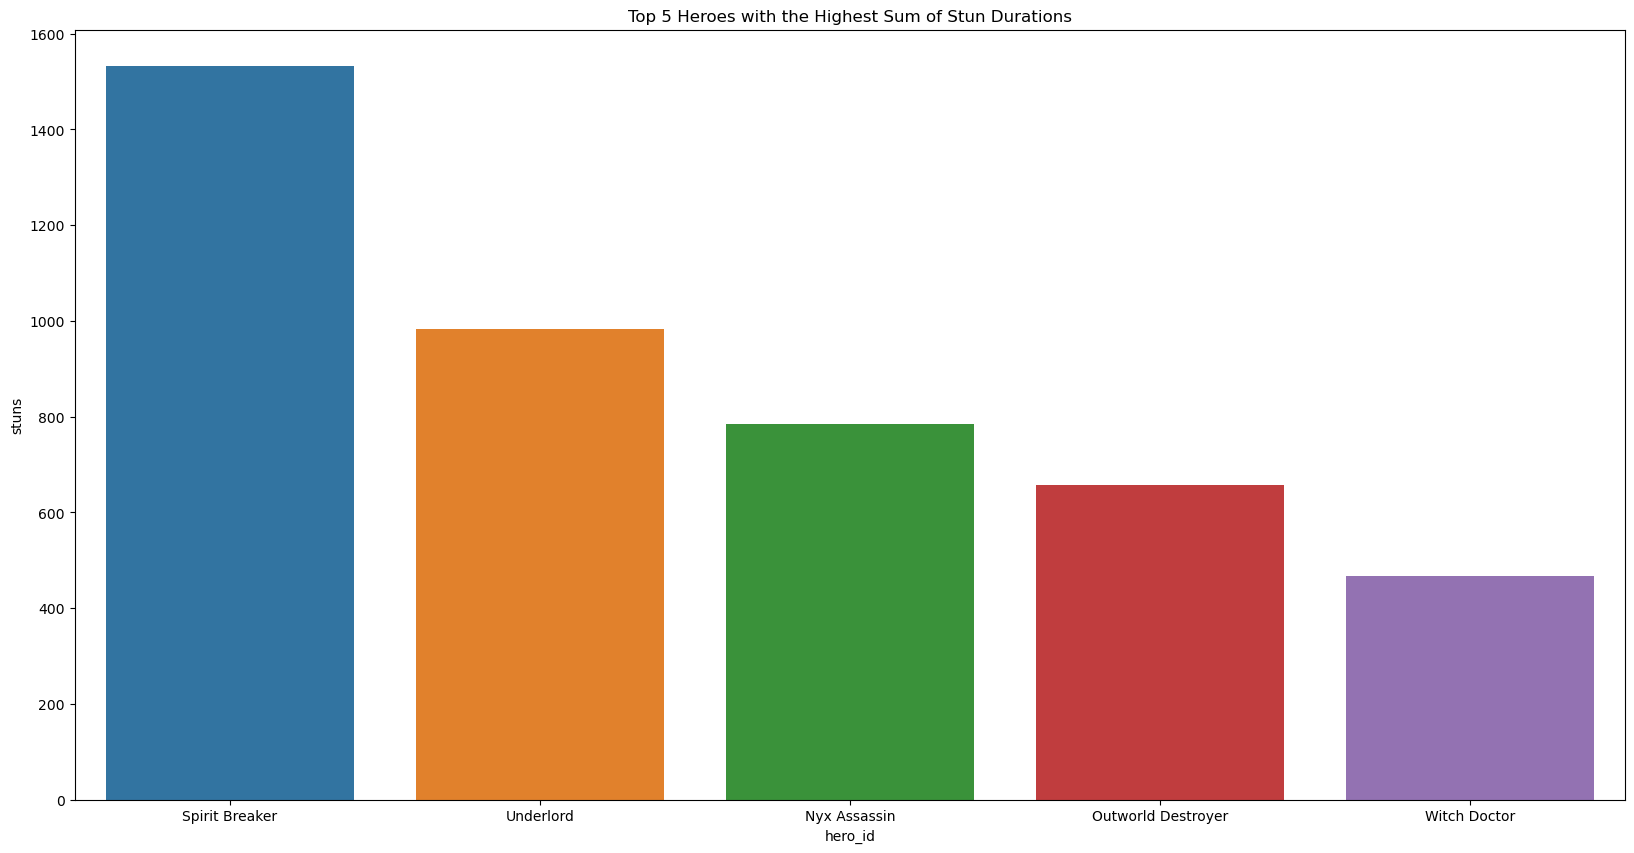

          personaname    hero_id     stuns    match_id
162  Big Boix LaCroix  Underlord  308.7992  7225829416


In [ ]:
clean.numbah_one_stunna(df)

Another high stat earning for Jbay as the numbahone overall stun time in the league. THere were lots of high stun heroes being picked each week so this is a pretty impressive feat. GRAFF nearly keeping up is also impressive as a p4 player. Big Boix however had nearly half the highest stun time of these players pulled out in a single game. Thats a lot of impressive underlord pit of malice. 

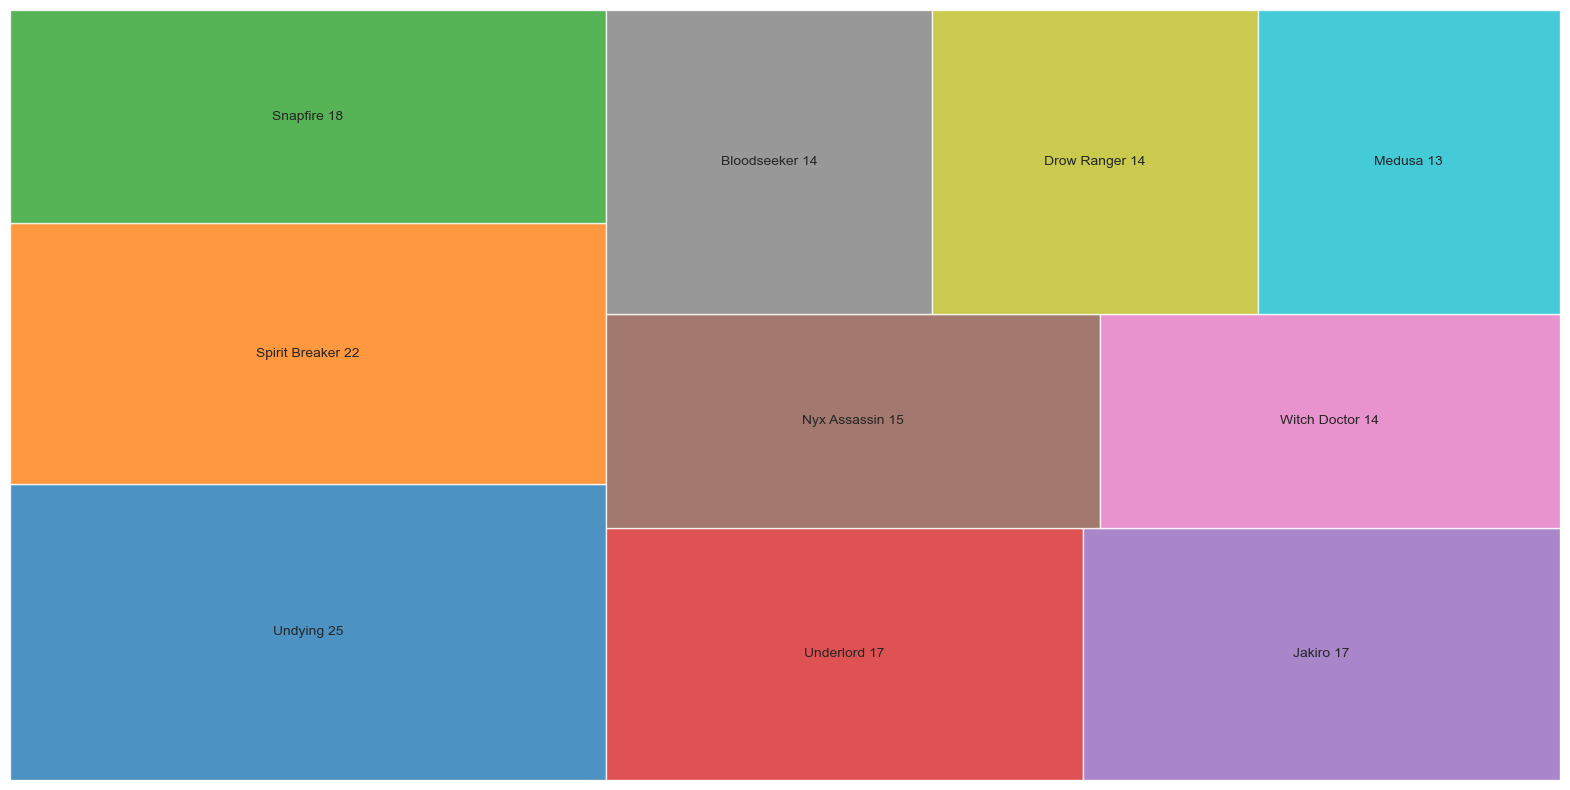

In [ ]:
clean.most_common_heroes(df)

This season Undying was the most picked hero with a 56% winrate. This top tier pick was mostly played by people below 1400 mmr. Spirit Breaker had a 50% winrate in second place but Snapfire in third had a 38% winrate. Yikes.

#

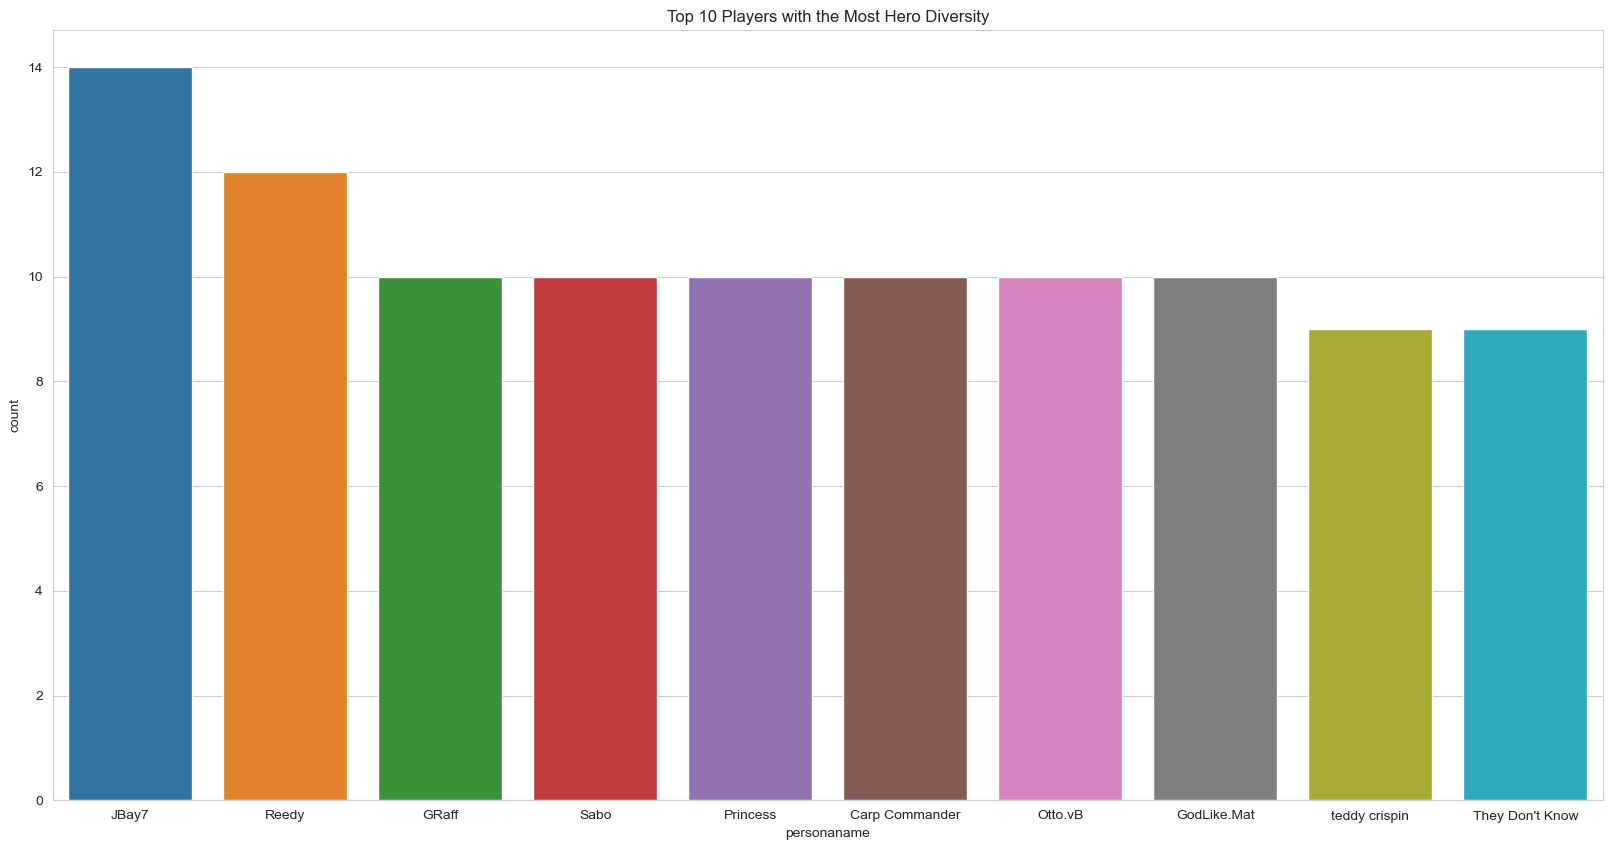

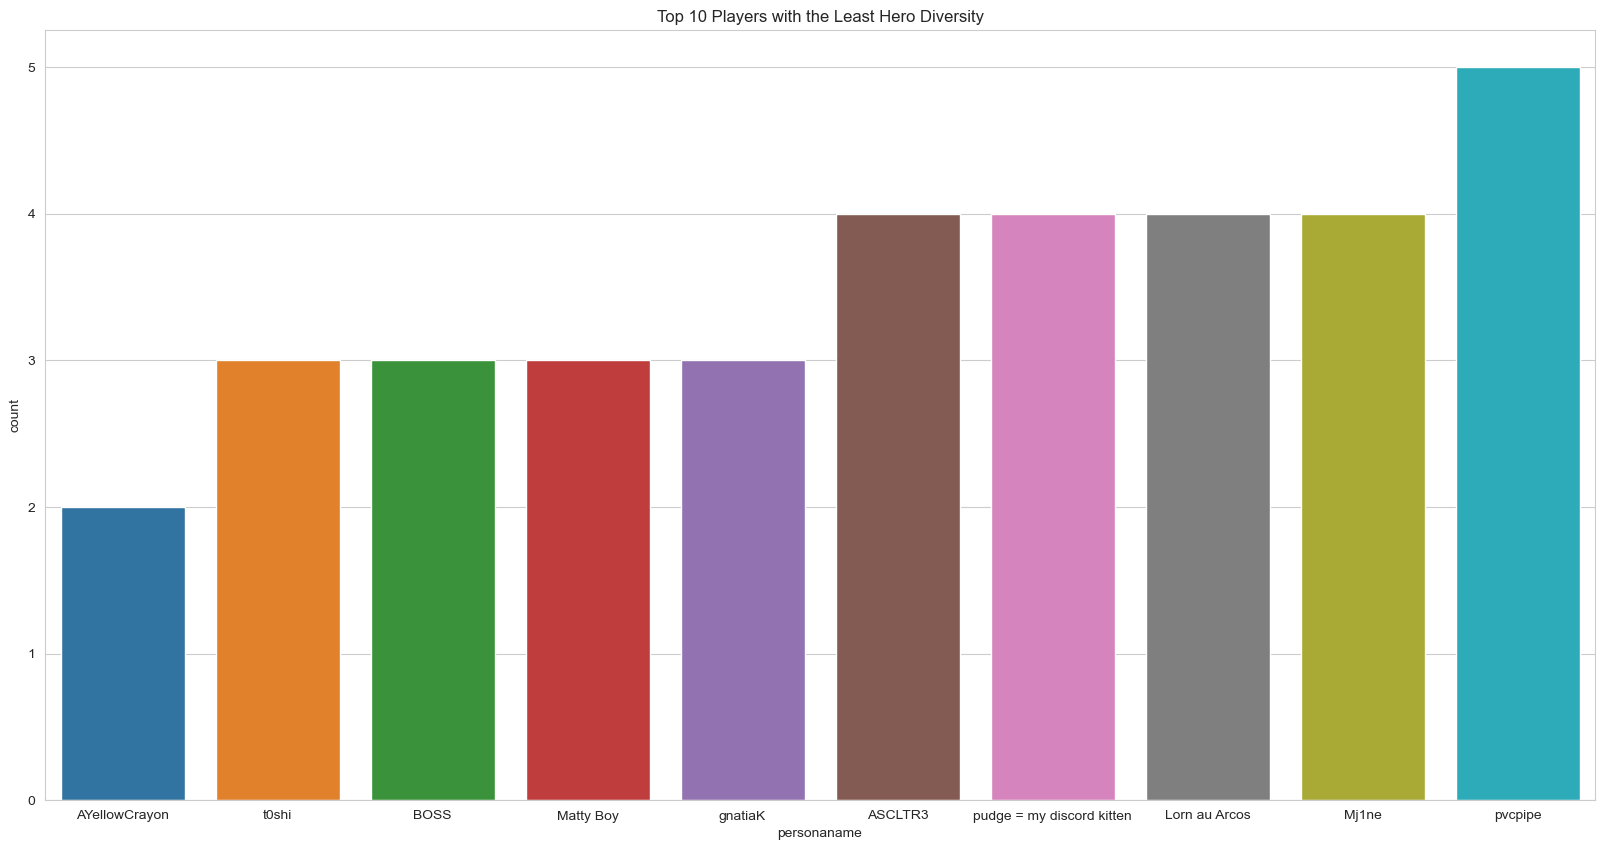

In [ ]:
clean.hero_puddle(df)

Jbay again with another top score. He picked a different hero every main season game. To whoever called him a hero puddler, you did this. This is the second season in a row where Jbay has had the most unique heroes picked.

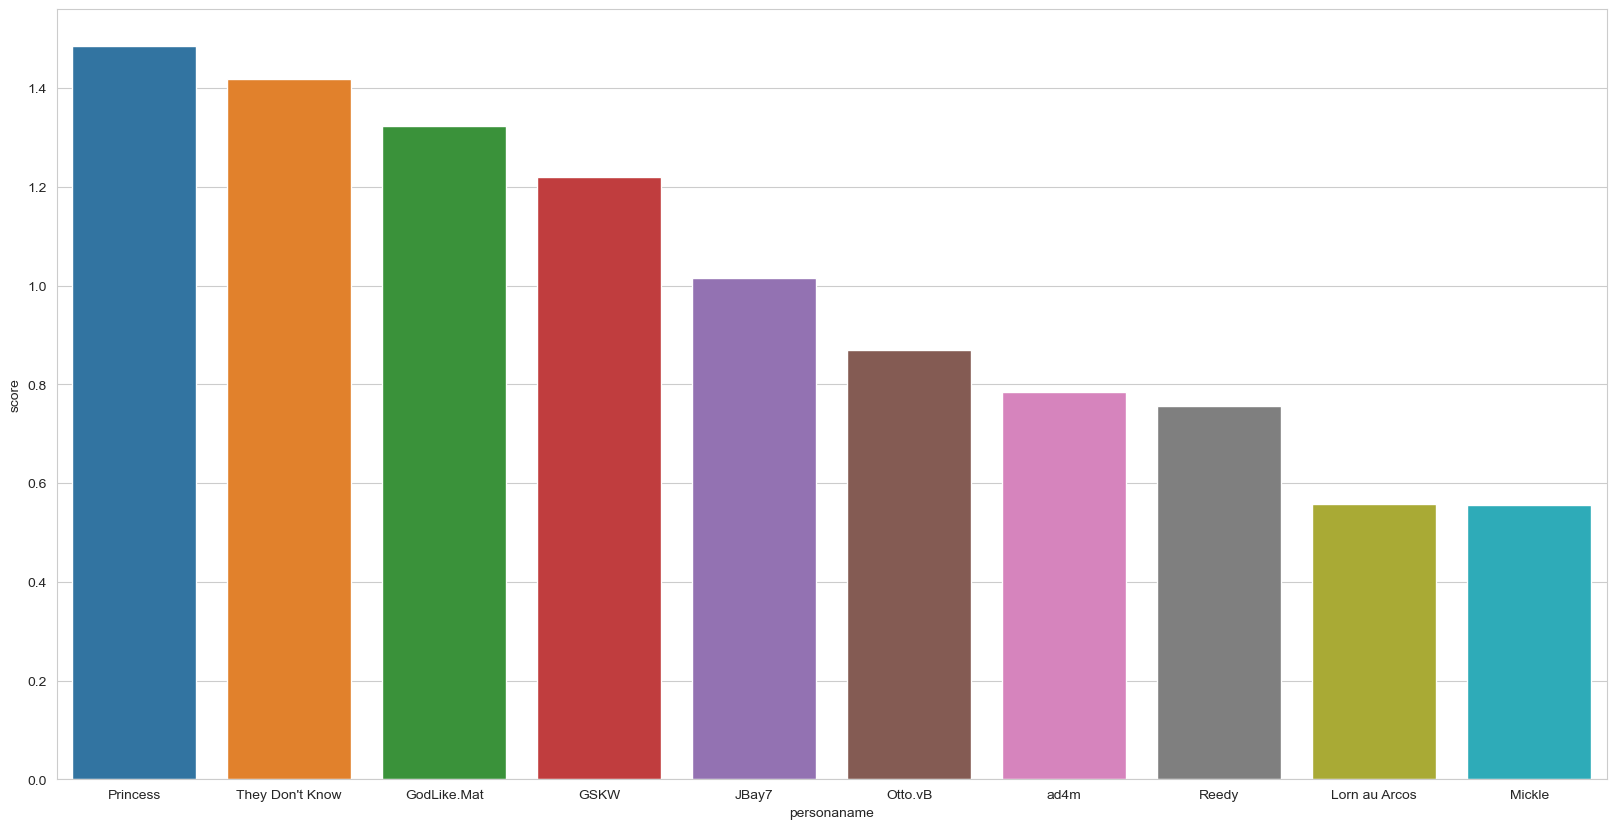

In [ ]:
def best_player(df):

    'creates a graph for scaled linear combination of gpm, xpm, and kda'

    df_best = df.groupby('personaname')[['gold_per_min', 'xp_per_min', 'kda']].mean().reset_index()
    scaler = RobustScaler()
    df_best['gold_per_min'] = scaler.fit_transform(df_best[['gold_per_min']])
    df_best['xp_per_min'] = scaler.fit_transform(df_best[['xp_per_min']])
    df_best['kda'] = scaler.fit_transform(df_best[['kda']])

    df_best['score'] = (df_best['gold_per_min'] + df_best['xp_per_min'] + df_best['kda']) / 3

    plt.figure(figsize=(20,10))
    sns.barplot(x='personaname', y='score', data=df_best.sort_values('score', ascending=False).head(10))
    plt.show()
    
best_player(df)


Princess is the best player in the league given a linear combination of scaled stats. Looter is probably the actual best player this last sesason given the fact that he played offrole and still had a great season. Of all the players, none of them were below legend. WHodve thought the best players would have the best medals...

There is a major limitation with this method and that it can't account for how good a support player is. I think this is a major flaw in the system and I will be looking into ways to fix this in the future and am open to ideas.

### Final thoughts

This season was a bit different with auction draft and I am not sure I am a fan of it for this ld2l. I hope there is a return to avg mmr rank draft next season.

The next season, I look forward to making more improvements to the stats and hopefully making a better system for ranking players. I am also looking forward to seeing how the league changes with post TI patch.

I also hope to get a full rundown of Coplice, our League MVP of this season. I am sure he has a lot of interesting things to say about his season and I hope to get a chance to interview him.

In [ ]:
!jupyter nbconvert --to webpdf --allow-chromium-download ld2l-16-analysis.ipynb

[NbConvertApp] Converting notebook ld2l-16-analysis.ipynb to webpdf
[NbConvertApp] Building PDF
[INFO] Starting Chromium download.

  0%|          | 0.00/137M [00:00<?, ?b/s]
  1%|1         | 1.41M/137M [00:00<00:09, 14.0Mb/s]
  4%|3         | 4.93M/137M [00:00<00:05, 26.3Mb/s]
  6%|5         | 7.57M/137M [00:00<00:05, 24.0Mb/s]
  8%|7         | 10.6M/137M [00:00<00:04, 26.5Mb/s]
 10%|#         | 13.7M/137M [00:00<00:04, 27.8Mb/s]
 12%|#2        | 16.7M/137M [00:00<00:04, 28.3Mb/s]
 14%|#4        | 19.5M/137M [00:00<00:04, 28.0Mb/s]
 16%|#6        | 22.6M/137M [00:00<00:03, 28.7Mb/s]
 19%|#8        | 26.0M/137M [00:00<00:03, 30.2Mb/s]
 21%|##1       | 29.1M/137M [00:01<00:03, 30.3Mb/s]
 24%|##3       | 32.3M/137M [00:01<00:03, 30.9Mb/s]
 26%|##5       | 35.4M/137M [00:01<00:03, 30.5Mb/s]
 28%|##8       | 38.6M/137M [00:01<00:03, 30.7Mb/s]
 30%|###       | 41.7M/137M [00:01<00:03, 30.3Mb/s]
 33%|###2      | 45.1M/137M [00:01<00:02, 31.4Mb/s]
 35%|###5      | 48.3M/137M [00:01<00:03, 29.